In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [251]:
# Load the data
data = pd.read_csv('controllers/my_ground/results_csvs/results.csv')

In [252]:
data['Robot Number'] = 5 - data['Robot Number']

In [253]:
# getting the percentage of success per robot number
success = data.groupby('Robot Number')['Success'].mean()

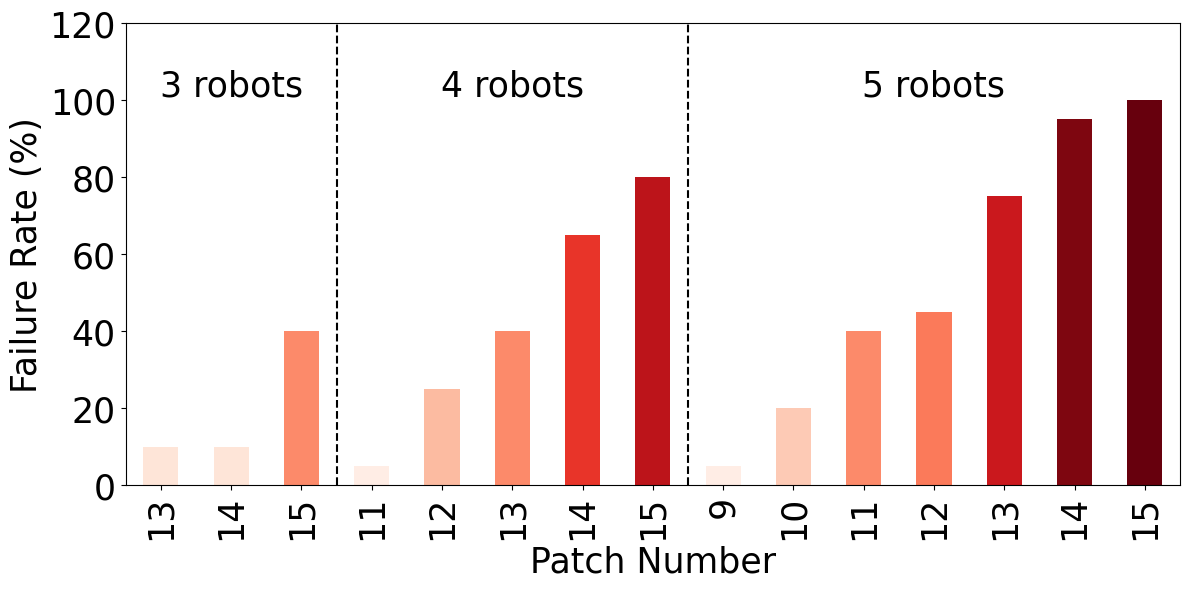

In [273]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Assuming 'data' is already loaded and processed
success_rate = (1 - data.groupby(['Robot Number', 'Patch Number'])['Success'].mean()) * 100
# Filter out 100% success rate
success_rate = success_rate[success_rate != 0]

# Generate a range of colors based on the length of success_rate
colors = cm.Reds([s / 100 for s in success_rate])

# Extract patch numbers and robot numbers
patch_numbers = success_rate.index.get_level_values('Patch Number')
robot_numbers = success_rate.index.get_level_values('Robot Number')

# Create the bar plot with the color mapping
ax = success_rate.plot(kind='bar', color=colors, figsize=(12, 6))

# Customize x-axis to show patch numbers under bars
ax.set_xticks(range(len(patch_numbers)))  # Set the positions of x-ticks
ax.set_xticklabels(patch_numbers, fontsize=25)  # Set labels to patch numbers
ax.set_xlabel('Patch Number', fontsize=25)  # Label for x-axis

# Set labels and ticks for y-axis
ax.set_ylabel('Failure Rate (%)', fontsize=25)
ax.set_yticks(ax.get_yticks())  # Set ticks explicitly
ax.set_yticklabels([f'{int(tick)}' for tick in ax.get_yticks()], fontsize=25)  # Format y-ticks

# Add vertical lines to separate robot numbers
unique_robots = sorted(set(robot_numbers))
robot_separators = [
    sum(robot_numbers == robot) for robot in unique_robots[:-1]
]  # Cumulative sum for separators
cumulative_sum = 0
for sep in robot_separators:
    cumulative_sum += sep
    ax.axvline(x=cumulative_sum - 0.5, color='black', linestyle='--')

# Add annotations for robot numbers above the plot
cumulative_sum = 0
for robot in unique_robots:
    count = sum(robot_numbers == robot)
    mid_point = (cumulative_sum + count / 2) / len(success_rate)
    ax.text(mid_point, 0.9, f'{robot} robots', ha='center', fontsize=25, va='top', transform=ax.transAxes, color='black')
    cumulative_sum += count
    
# ax.text(0.5, 0.5, 'matplotlib', horizontalalignment='center',
#      verticalalignment='center', transform=ax.transAxes, color='black')

# Adjust layout and save
plt.tight_layout()
plt.savefig('plots/failure_rate_with_labels.png')
plt.show()

In [274]:
# filtering out failed runs
data['timeout'] = data['Run Time'] > 600
filtered_data = data[data['Success'] == True]

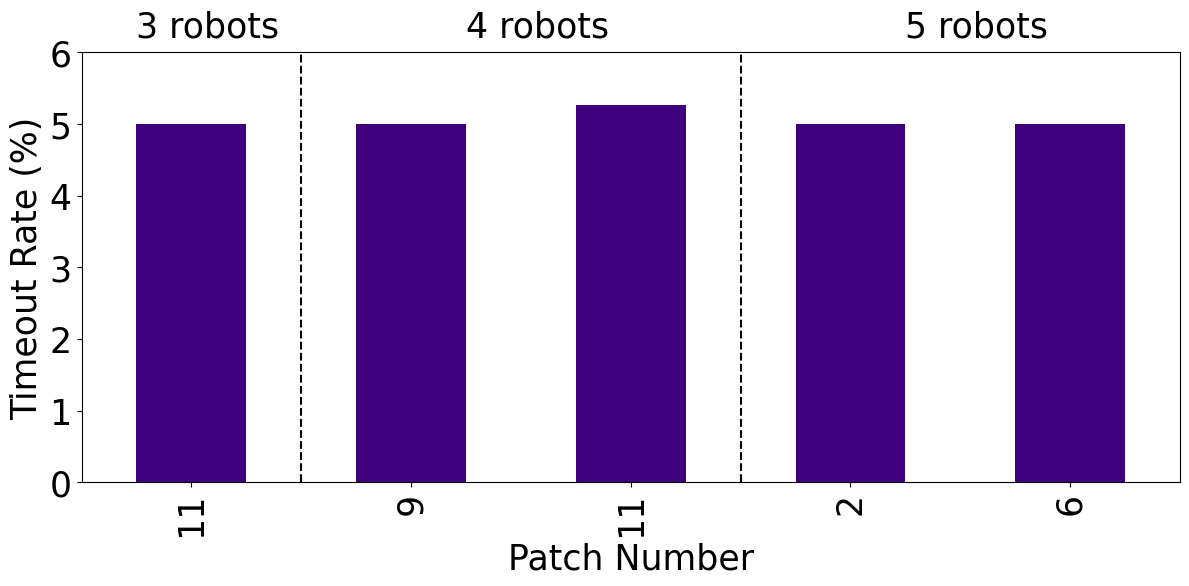

In [275]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm


# Assuming 'data' is already loaded and processed
timeout_rate = (filtered_data.groupby(['Robot Number', 'Patch Number'])['timeout'].mean()) * 100
# Filter out 100% success rate
timeout_rate = timeout_rate[timeout_rate != 0]

# Generate a range of colors based on the length of success_rate
colors = cm.Purples([s * 0.6 / (max(timeout_rate) - min(timeout_rate)) for s in timeout_rate])

# Extract patch numbers and robot numbers
patch_numbers = timeout_rate.index.get_level_values('Patch Number')
robot_numbers = timeout_rate.index.get_level_values('Robot Number')

# Create the bar plot with the color mapping
ax = timeout_rate.plot(kind='bar', color=colors, figsize=(12, 6))

# Customize x-axis to show patch numbers under bars
ax.set_xticks(range(len(patch_numbers)))  # Set the positions of x-ticks
ax.set_xticklabels(patch_numbers, fontsize=25)  # Set labels to patch numbers
ax.set_xlabel('Patch Number', fontsize=25)  # Label for x-axis

# Set labels and ticks for y-axis
ax.set_ylabel('Timeout Rate (%)', fontsize=25)
ax.set_yticks(ax.get_yticks())  # Set ticks explicitly
ax.set_yticklabels([f'{int(tick)}' for tick in ax.get_yticks()], fontsize=25)  # Format y-ticks

# Add vertical lines to separate robot numbers
unique_robots = sorted(set(robot_numbers))
robot_separators = [
    sum(robot_numbers == robot) for robot in unique_robots[:-1]
]  # Cumulative sum for separators
cumulative_sum = 0
for sep in robot_separators:
    cumulative_sum += sep
    ax.axvline(x=cumulative_sum - 0.5, color='black', linestyle='--')

# Add annotations for robot numbers above the plot
cumulative_sum = 0
for robot in unique_robots:
    count = sum(robot_numbers == robot)
    mid_point = (cumulative_sum + count / 2) / len(timeout_rate) - 0.05
    ax.text(mid_point, 1.1, f'{robot} robots', ha='left', fontsize=25, va='top', transform=ax.transAxes, color='black')
    cumulative_sum += count
    
# ax.text(0.5, 0.5, 'matplotlib', horizontalalignment='center',
#      verticalalignment='center', transform=ax.transAxes, color='black')

# Adjust layout and save
plt.tight_layout()
plt.savefig('plots/timeout_rate_with_labels.png')
plt.show()

In [276]:
# filtering out time-outs
vert_filtered_data = filtered_data[filtered_data['Run Time'] < 600]

In [277]:
vert_filtered_data[(150 <= vert_filtered_data['Run Time']) & (vert_filtered_data['Run Time'] <= 600)]

,Patch Number,Robot Number,Seed,Algorithm Time,Success,Run Time,Total Time,Price,timeout


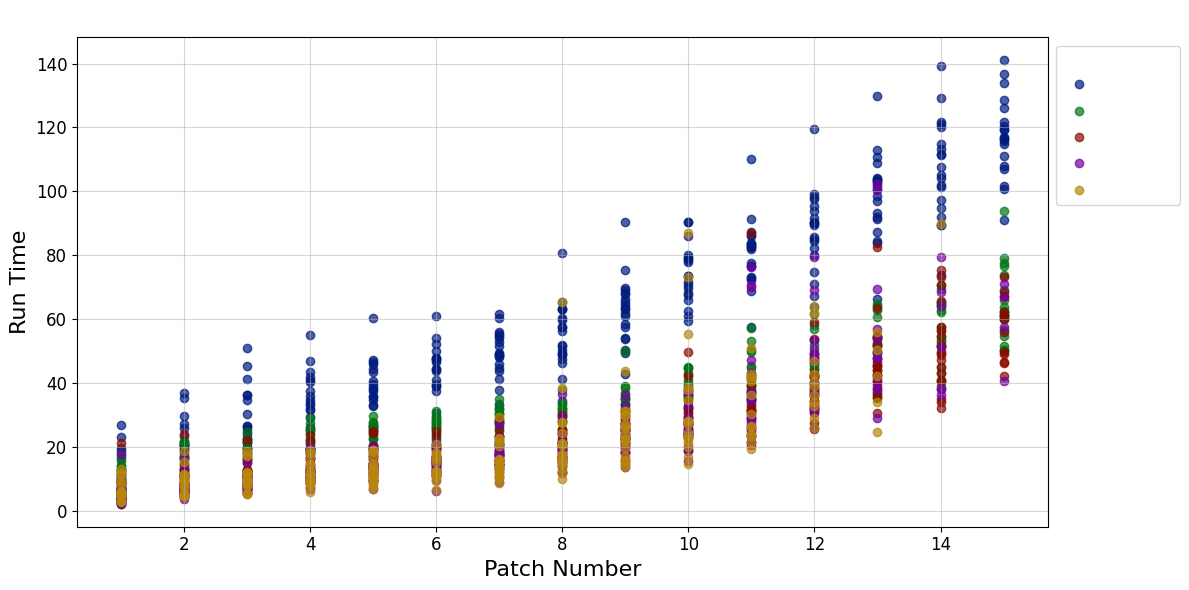

In [279]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot data for each robot number
for robot in sorted(vert_filtered_data['Robot Number'].unique()):
    robot_data = vert_filtered_data[vert_filtered_data['Robot Number'] == robot]
    ax.scatter(
        robot_data['Patch Number'], 
        robot_data['Run Time'], 
        label=f'Robot {robot}', 
        alpha=0.7
    )

# Customize the plot
ax.set_xlabel('Patch Number', fontsize=16)
ax.set_ylabel('Run Time', fontsize=16)
ax.set_title('Runtimes by Patch Number and Robot Number', fontsize=18)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.legend(title='Robot Number', fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))
ax.grid(alpha=0.5)

# Adjust layout
plt.tight_layout()

# Save and show the plot
plt.savefig('plots/runtimes_scatter_separated_ax.png')
plt.show()

In [272]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm


run_time = vert_filtered_data['Run Time']

# converting run time to dataframe

# Generate a range of colors based on the length of success_rate
colors = cm.Blues([s * 0.6 / (max(run_time) - min(run_time)) for s in run_time])

# Extract patch numbers and robot numbers
patch_numbers = run_time.index.get_level_values('Patch Number')
robot_numbers = run_time.index.get_level_values('Robot Number')

# Create the bar plot with the color mapping
ax.scatter(
        robot_data['Patch Number'], 
        robot_data['Run Time'], 
        label=f'{robot} robots', 
        alpha=0.7
    )

# Customize x-axis to show patch numbers under bars
ax.set_xticks(range(len(patch_numbers)))  # Set the positions of x-ticks
ax.set_xticklabels(patch_numbers, fontsize=25)  # Set labels to patch numbers
ax.set_xlabel('Patch Number', fontsize=25)  # Label for x-axis

# Set labels and ticks for y-axis
ax.set_ylabel('Run Time (seconds)', fontsize=25)
ax.set_yticks(ax.get_yticks())  # Set ticks explicitly
ax.set_yticklabels([f'{int(tick)}' for tick in ax.get_yticks()], fontsize=25)  # Format y-ticks

# Add vertical lines to separate robot numbers
unique_robots = sorted(set(robot_numbers))
robot_separators = [
    sum(robot_numbers == robot) for robot in unique_robots[:-1]
]  # Cumulative sum for separators
cumulative_sum = 0
for sep in robot_separators:
    cumulative_sum += sep
    ax.axvline(x=cumulative_sum - 0.5, color='black', linestyle='--')

# Add annotations for robot numbers above the plot
cumulative_sum = 0
for robot in unique_robots:
    count = sum(robot_numbers == robot)
    mid_point = (cumulative_sum + count / 2) / len(run_time) - 0.05
    ax.text(mid_point, 1.1, f'{robot} robots', ha='left', fontsize=25, va='top', transform=ax.transAxes, color='black')
    cumulative_sum += count
    
# ax.text(0.5, 0.5, 'matplotlib', horizontalalignment='center',
#      verticalalignment='center', transform=ax.transAxes, color='black')

# Adjust layout and save
plt.tight_layout()
plt.savefig('run_time_with_labels.png')
plt.show()

KeyError: 'Requested level (Patch Number) does not match index name (None)'

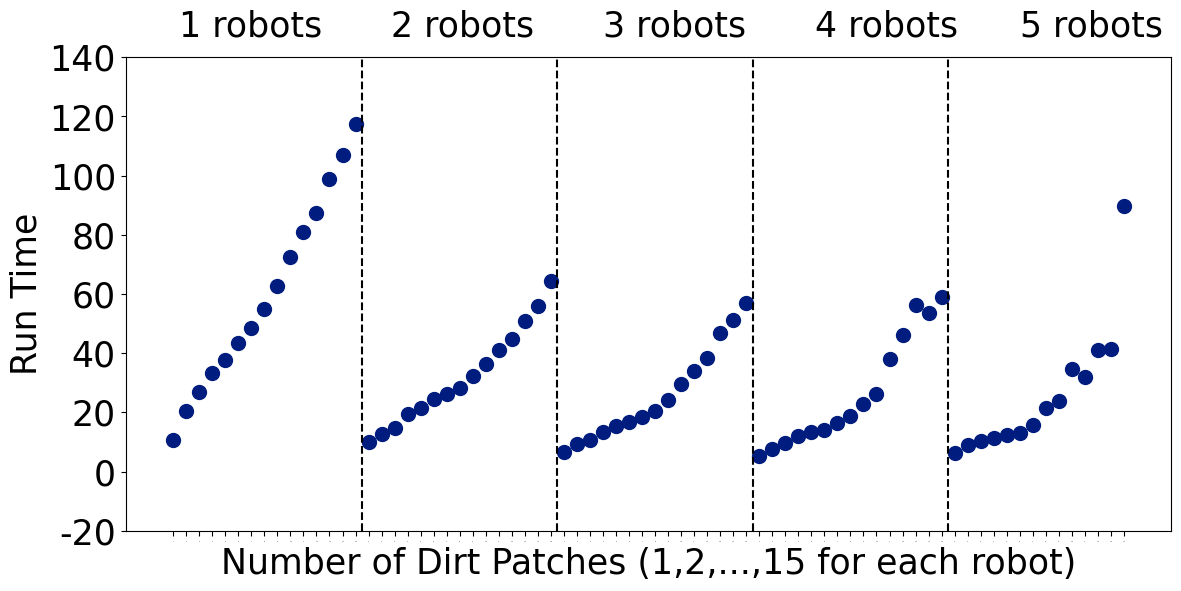

In [280]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm


# Assuming 'data' is already loaded and processed
run_time = (vert_filtered_data.groupby(['Robot Number', 'Patch Number'])['Run Time'].mean())

# Generate a range of colors based on the length of success_rate
colors = cm.Blues([s / 120 for s in run_time])

# Extract patch numbers and robot numbers
patch_numbers = run_time.index.get_level_values('Patch Number')
robot_numbers = run_time.index.get_level_values('Robot Number')

# Create the bar plot with the color mapping
ax = run_time.plot(figsize=(12, 6), marker='o', linestyle='None', markersize=10)

# Customize x-axis to show patch numbers under bars
ax.set_xticks(range(len(patch_numbers)))  # Set the positions of x-ticks
ax.set_xticklabels(patch_numbers, fontsize=0)  # Set labels to patch numbers
ax.set_xlabel('Number of Dirt Patches (1,2,...,15 for each robot)', fontsize=25)  # Label for x-axis

# Set labels and ticks for y-axis
ax.set_ylabel('Run Time', fontsize=25)
ax.set_yticks(ax.get_yticks())  # Set ticks explicitly
ax.set_yticklabels([f'{int(tick)}' for tick in ax.get_yticks()], fontsize=25)  # Format y-ticks

# Add vertical lines to separate robot numbers
unique_robots = sorted(set(robot_numbers))
robot_separators = [
    sum(robot_numbers == robot) for robot in unique_robots[:-1]
]  # Cumulative sum for separators
cumulative_sum = 0
for sep in robot_separators:
    cumulative_sum += sep
    ax.axvline(x=cumulative_sum - 0.5, color='black', linestyle='--')

# Add annotations for robot numbers above the plot
cumulative_sum = 0
for robot in unique_robots:
    count = sum(robot_numbers == robot)
    mid_point = (cumulative_sum + count / 2) / len(run_time) - 0.05
    ax.text(mid_point, 1.1, f'{robot} robots', ha='left', fontsize=25, va='top', transform=ax.transAxes, color='black')
    cumulative_sum += count
    
# ax.text(0.5, 0.5, 'matplotlib', horizontalalignment='center',
#      verticalalignment='center', transform=ax.transAxes, color='black')

# Adjust layout and save
plt.tight_layout()
plt.savefig('plots/run_time_with_labels.png')
plt.show()

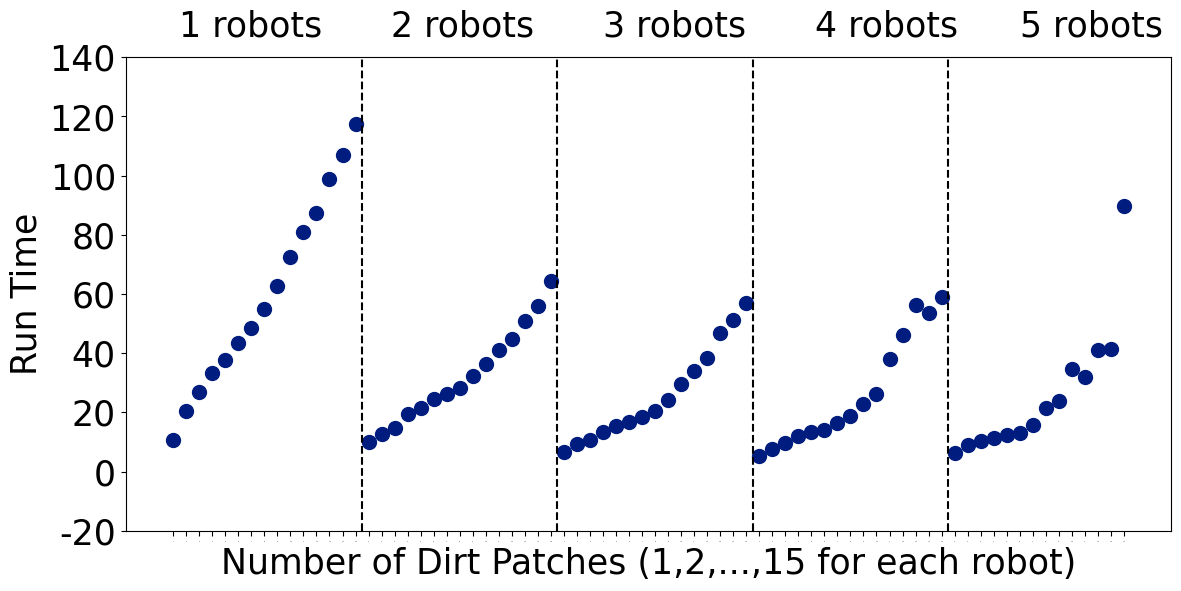

In [281]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm


# Assuming 'data' is already loaded and processed
run_time = (vert_filtered_data.groupby(['Robot Number', 'Patch Number'])['Run Time'].mean())

# Generate a range of colors based on the length of success_rate
colors = cm.Blues([s / 120 for s in run_time])

# Extract patch numbers and robot numbers
patch_numbers = run_time.index.get_level_values('Patch Number')
robot_numbers = run_time.index.get_level_values('Robot Number')

# Create the bar plot with the color mapping
ax = run_time.plot(figsize=(12, 6), marker='o', linestyle='None', markersize=10)

# Customize x-axis to show patch numbers under bars
ax.set_xticks(range(len(patch_numbers)))  # Set the positions of x-ticks
ax.set_xticklabels(patch_numbers, fontsize=0)  # Set labels to patch numbers
ax.set_xlabel('Number of Dirt Patches (1,2,...,15 for each robot)', fontsize=25)  # Label for x-axis

# Set labels and ticks for y-axis
ax.set_ylabel('Run Time', fontsize=25)
ax.set_yticks(ax.get_yticks())  # Set ticks explicitly
ax.set_yticklabels([f'{int(tick)}' for tick in ax.get_yticks()], fontsize=25)  # Format y-ticks

# Add vertical lines to separate robot numbers
unique_robots = sorted(set(robot_numbers))
robot_separators = [
    sum(robot_numbers == robot) for robot in unique_robots[:-1]
]  # Cumulative sum for separators
cumulative_sum = 0
for sep in robot_separators:
    cumulative_sum += sep
    ax.axvline(x=cumulative_sum - 0.5, color='black', linestyle='--')

# Add annotations for robot numbers above the plot
cumulative_sum = 0
for robot in unique_robots:
    count = sum(robot_numbers == robot)
    mid_point = (cumulative_sum + count / 2) / len(run_time) - 0.05
    ax.text(mid_point, 1.1, f'{robot} robots', ha='left', fontsize=25, va='top', transform=ax.transAxes, color='black')
    cumulative_sum += count
    
# ax.text(0.5, 0.5, 'matplotlib', horizontalalignment='center',
#      verticalalignment='center', transform=ax.transAxes, color='black')

# Adjust layout and save
plt.tight_layout()
plt.savefig('plots/run_time_with_labels.png')
plt.show()

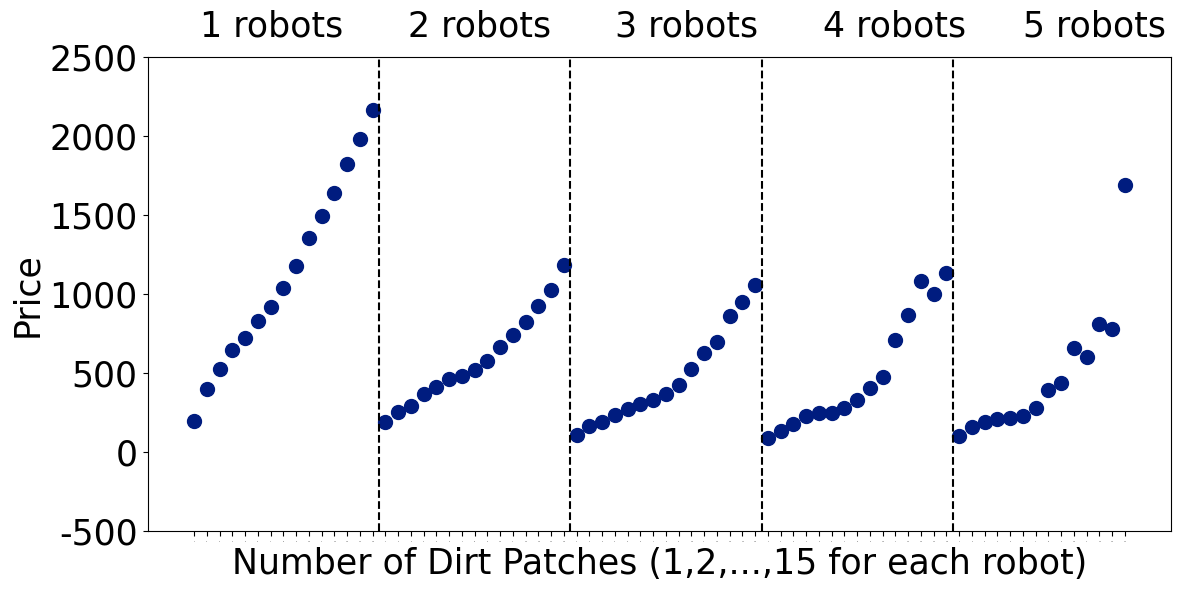

In [282]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm


# Assuming 'data' is already loaded and processed
price = (vert_filtered_data.groupby(['Robot Number', 'Patch Number'])['Price'].mean())

# Generate a range of colors based on the length of success_rate
colors = cm.Blues([s / 120 for s in price])

# Extract patch numbers and robot numbers
patch_numbers = price.index.get_level_values('Patch Number')
robot_numbers = price.index.get_level_values('Robot Number')

# Create the bar plot with the color mapping
ax = price.plot(figsize=(12, 6), marker='o', linestyle='None', markersize=10)

# Customize x-axis to show patch numbers under bars
ax.set_xticks(range(len(patch_numbers)))  # Set the positions of x-ticks
ax.set_xticklabels(patch_numbers, fontsize=0)  # Set labels to patch numbers
ax.set_xlabel('Number of Dirt Patches (1,2,...,15 for each robot)', fontsize=25)  # Label for x-axis

# Set labels and ticks for y-axis
ax.set_ylabel('Price', fontsize=25)
ax.set_yticks(ax.get_yticks())  # Set ticks explicitly
ax.set_yticklabels([f'{int(tick)}' for tick in ax.get_yticks()], fontsize=25)  # Format y-ticks

# Add vertical lines to separate robot numbers
unique_robots = sorted(set(robot_numbers))
robot_separators = [
    sum(robot_numbers == robot) for robot in unique_robots[:-1]
]  # Cumulative sum for separators
cumulative_sum = 0
for sep in robot_separators:
    cumulative_sum += sep
    ax.axvline(x=cumulative_sum - 0.5, color='black', linestyle='--')

# Add annotations for robot numbers above the plot
cumulative_sum = 0
for robot in unique_robots:
    count = sum(robot_numbers == robot)
    mid_point = (cumulative_sum + count / 2) / len(price) - 0.05
    ax.text(mid_point, 1.1, f'{robot} robots', ha='left', fontsize=25, va='top', transform=ax.transAxes, color='black')
    cumulative_sum += count
    
# ax.text(0.5, 0.5, 'matplotlib', horizontalalignment='center',
#      verticalalignment='center', transform=ax.transAxes, color='black')

# Adjust layout and save
plt.tight_layout()
plt.savefig('plots/price_with_labels.png')
plt.show()

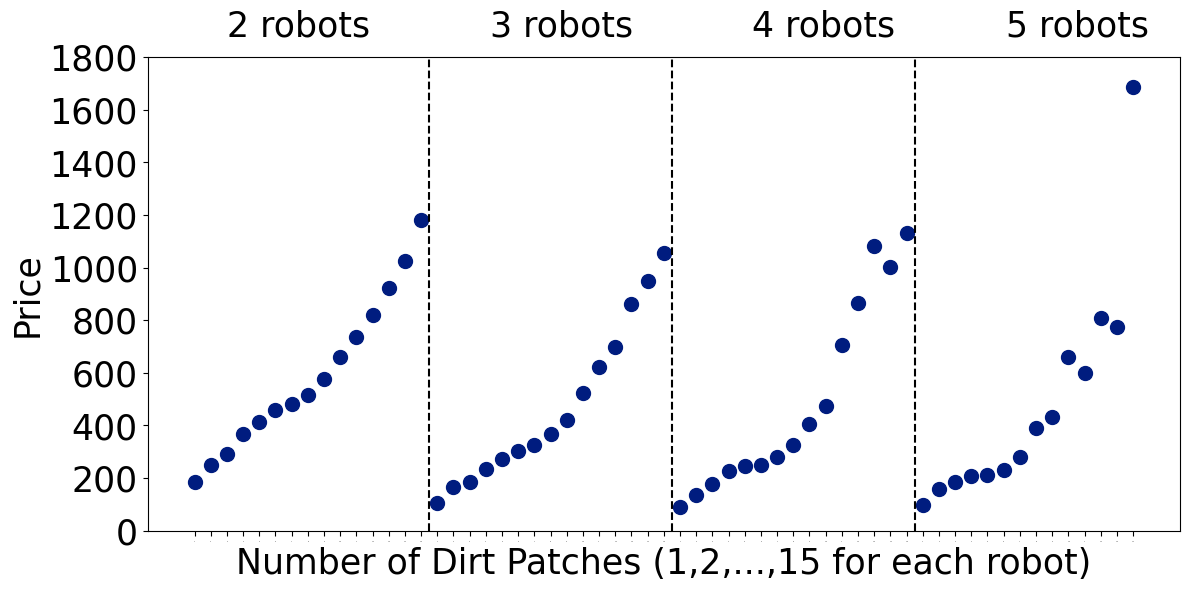

In [287]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

data_4 = vert_filtered_data[vert_filtered_data['Robot Number'] > 1]


# Assuming 'data' is already loaded and processed
price = (data_4.groupby(['Robot Number', 'Patch Number'])['Price'].mean())

# Generate a range of colors based on the length of success_rate
colors = cm.Blues([s / 120 for s in price])

# Extract patch numbers and robot numbers
patch_numbers = price.index.get_level_values('Patch Number')
robot_numbers = price.index.get_level_values('Robot Number')

# Create the bar plot with the color mapping
ax = price.plot(figsize=(12, 6), marker='o', linestyle='None', markersize=10)

# Customize x-axis to show patch numbers under bars
ax.set_xticks(range(len(patch_numbers)))  # Set the positions of x-ticks
ax.set_xticklabels(patch_numbers, fontsize=0)  # Set labels to patch numbers
ax.set_xlabel('Number of Dirt Patches (1,2,...,15 for each robot)', fontsize=25)  # Label for x-axis

# Set labels and ticks for y-axis
ax.set_ylabel('Price', fontsize=25)
ax.set_yticks(ax.get_yticks())  # Set ticks explicitly
ax.set_yticklabels([f'{int(tick)}' for tick in ax.get_yticks()], fontsize=25)  # Format y-ticks

# Add vertical lines to separate robot numbers
unique_robots = sorted(set(robot_numbers))
robot_separators = [
    sum(robot_numbers == robot) for robot in unique_robots[:-1]
]  # Cumulative sum for separators
cumulative_sum = 0
for sep in robot_separators:
    cumulative_sum += sep
    ax.axvline(x=cumulative_sum - 0.5, color='black', linestyle='--')

# Add annotations for robot numbers above the plot
cumulative_sum = 0
for robot in unique_robots:
    count = sum(robot_numbers == robot)
    mid_point = (cumulative_sum + count / 2) / len(price) - 0.05
    ax.text(mid_point, 1.1, f'{robot} robots', ha='left', fontsize=25, va='top', transform=ax.transAxes, color='black')
    cumulative_sum += count
    
# ax.text(0.5, 0.5, 'matplotlib', horizontalalignment='center',
#      verticalalignment='center', transform=ax.transAxes, color='black')

# Adjust layout and save
plt.tight_layout()
plt.savefig('plots/price_with_labels_4.png')
plt.show()

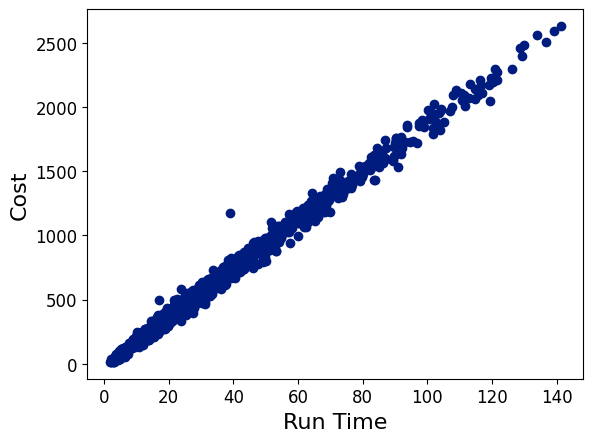

In [283]:
# plotting scatter plot of time vs price using vert_filtered_data
import matplotlib.pyplot as plt

plt.plot(vert_filtered_data['Run Time'], vert_filtered_data['Price'], 'o')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Run Time', fontsize=16)
plt.ylabel('Cost', fontsize=16)

plt.savefig('plots/time_vs_price.png')
plt.show()


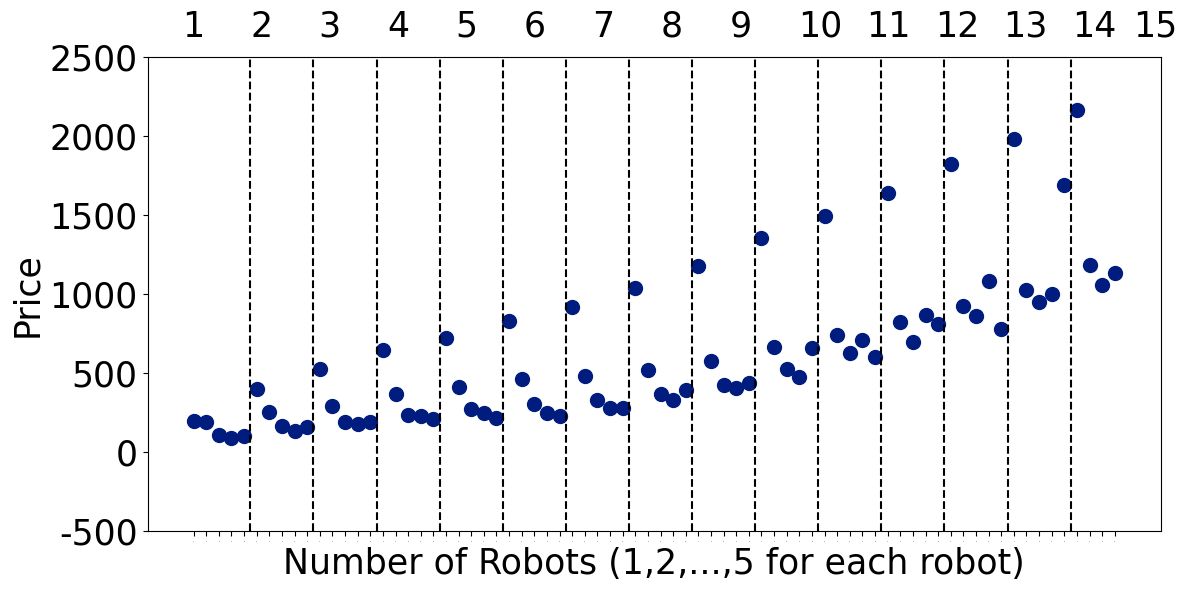

In [286]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm


# Assuming 'data' is already loaded and processed
price = (vert_filtered_data.groupby(['Patch Number', 'Robot Number'])['Price'].mean())

# Generate a range of colors based on the length of success_rate
colors = cm.Blues([s / 120 for s in price])

# Extract patch numbers and robot numbers
patch_numbers = price.index.get_level_values('Patch Number')
robot_numbers = price.index.get_level_values('Robot Number')

# Create the bar plot with the color mapping
ax = price.plot(figsize=(12, 6), marker='o', linestyle='None', markersize=10)

# Customize x-axis to show patch numbers under bars
ax.set_xticks(range(len(robot_numbers)))  # Set the positions of x-ticks
ax.set_xticklabels(robot_numbers, fontsize=0)  # Set labels to patch numbers
ax.set_xlabel('Number of Robots (1,2,...,5 for each robot)', fontsize=25)  # Label for x-axis

# Set labels and ticks for y-axis
ax.set_ylabel('Price', fontsize=25)
ax.set_yticks(ax.get_yticks())  # Set ticks explicitly
ax.set_yticklabels([f'{int(tick)}' for tick in ax.get_yticks()], fontsize=25)  # Format y-ticks

# Add vertical lines to separate robot numbers
unique_patches = sorted(set(patch_numbers))
patch_separators = [
    sum(patch_numbers == patch) for patch in unique_patches[:-1]
]  # Cumulative sum for separators
cumulative_sum = 0
for sep in patch_separators:
    cumulative_sum += sep
    ax.axvline(x=cumulative_sum - 0.5, color='black', linestyle='--')

# Add annotations for robot numbers above the plot
cumulative_sum = 0
for patch in unique_patches:
    count = sum(patch_numbers == patch)
    mid_point = (cumulative_sum + count / 2) / len(price)
    ax.text(mid_point, 1.1, f'{patch}', ha='left', fontsize=25, va='top', transform=ax.transAxes, color='black')
    cumulative_sum += count
    
# ax.text(0.5, 0.5, 'matplotlib', horizontalalignment='center',
#      verticalalignment='center', transform=ax.transAxes, color='black')

# Adjust layout and save
plt.tight_layout()
plt.savefig('plots/price_with_labels_patches.png')
plt.show()

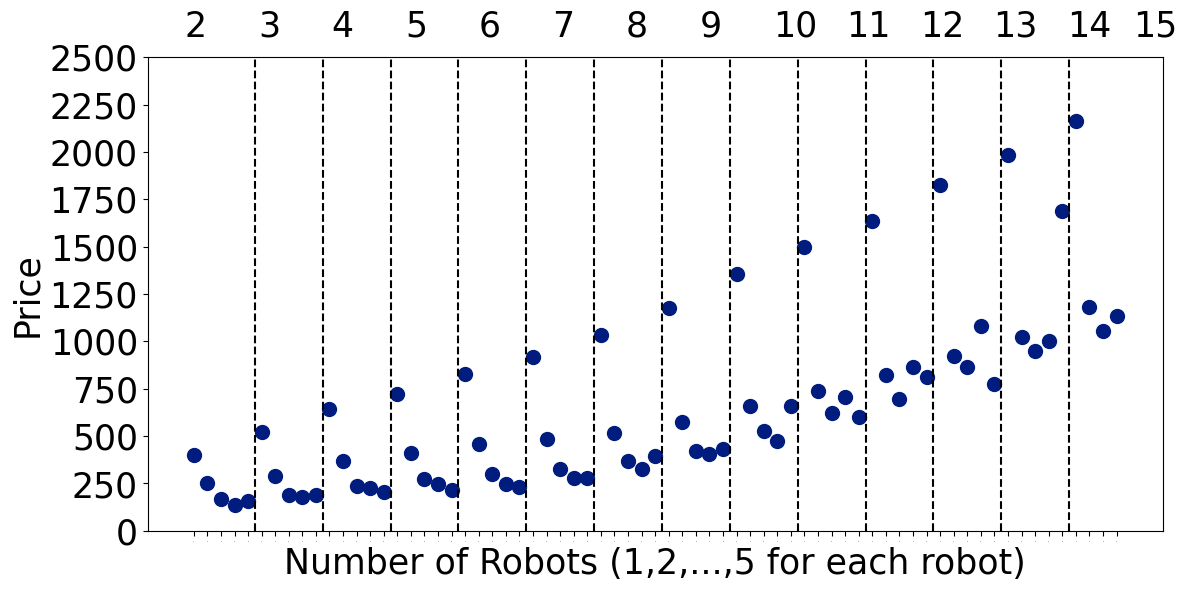

In [288]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

data_14 = vert_filtered_data[vert_filtered_data['Patch Number'] > 1]


# Assuming 'data' is already loaded and processed
price = (data_14.groupby(['Patch Number', 'Robot Number'])['Price'].mean())

# Generate a range of colors based on the length of success_rate
colors = cm.Blues([s / 120 for s in price])

# Extract patch numbers and robot numbers
patch_numbers = price.index.get_level_values('Patch Number')
robot_numbers = price.index.get_level_values('Robot Number')

# Create the bar plot with the color mapping
ax = price.plot(figsize=(12, 6), marker='o', linestyle='None', markersize=10)

# Customize x-axis to show patch numbers under bars
ax.set_xticks(range(len(robot_numbers)))  # Set the positions of x-ticks
ax.set_xticklabels(robot_numbers, fontsize=0)  # Set labels to patch numbers
ax.set_xlabel('Number of Robots (1,2,...,5 for each robot)', fontsize=25)  # Label for x-axis

# Set labels and ticks for y-axis
ax.set_ylabel('Price', fontsize=25)
ax.set_yticks(ax.get_yticks())  # Set ticks explicitly
ax.set_yticklabels([f'{int(tick)}' for tick in ax.get_yticks()], fontsize=25)  # Format y-ticks

# Add vertical lines to separate robot numbers
unique_patches = sorted(set(patch_numbers))
patch_separators = [
    sum(patch_numbers == patch) for patch in unique_patches[:-1]
]  # Cumulative sum for separators
cumulative_sum = 0
for sep in patch_separators:
    cumulative_sum += sep
    ax.axvline(x=cumulative_sum - 0.5, color='black', linestyle='--')

# Add annotations for robot numbers above the plot
cumulative_sum = 0
for patch in unique_patches:
    count = sum(patch_numbers == patch)
    mid_point = (cumulative_sum + count / 2) / len(price)
    ax.text(mid_point, 1.1, f'{patch}', ha='left', fontsize=25, va='top', transform=ax.transAxes, color='black')
    cumulative_sum += count
    
# ax.text(0.5, 0.5, 'matplotlib', horizontalalignment='center',
#      verticalalignment='center', transform=ax.transAxes, color='black')

# Adjust layout and save
plt.tight_layout()
plt.savefig('plots/price_with_labels_patches.png')
plt.show()

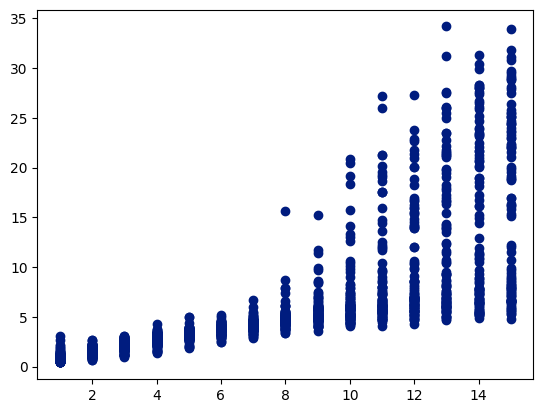

In [291]:
# plotting algorithm run time

import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.plot(data['Patch Number'], data['Algorithm Time'], 'o')

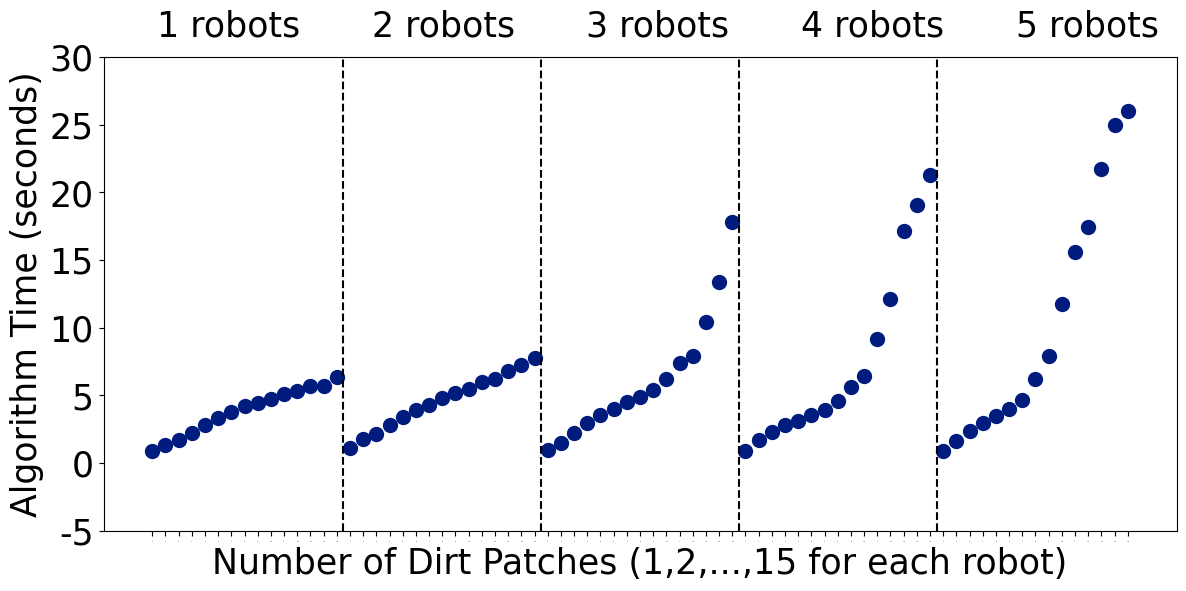

In [296]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm


# Assuming 'data' is already loaded and processed
run_time = (data.groupby(['Robot Number', 'Patch Number'])['Algorithm Time'].mean())

# Generate a range of colors based on the length of success_rate
colors = cm.Blues([s / 120 for s in run_time])

# Extract patch numbers and robot numbers
patch_numbers = run_time.index.get_level_values('Patch Number')
robot_numbers = run_time.index.get_level_values('Robot Number')

# Create the bar plot with the color mapping
ax = run_time.plot(figsize=(12, 6), marker='o', linestyle='None', markersize=10)

# Customize x-axis to show patch numbers under bars
ax.set_xticks(range(len(patch_numbers)))  # Set the positions of x-ticks
ax.set_xticklabels(patch_numbers, fontsize=0)  # Set labels to patch numbers
ax.set_xlabel('Number of Dirt Patches (1,2,...,15 for each robot)', fontsize=25)  # Label for x-axis

# Set labels and ticks for y-axis
ax.set_ylabel('Algorithm Time (seconds)', fontsize=25)
ax.set_yticks(ax.get_yticks())  # Set ticks explicitly
ax.set_yticklabels([f'{int(tick)}' for tick in ax.get_yticks()], fontsize=25)  # Format y-ticks

# Add vertical lines to separate robot numbers
unique_robots = sorted(set(robot_numbers))
robot_separators = [
    sum(robot_numbers == robot) for robot in unique_robots[:-1]
]  # Cumulative sum for separators
cumulative_sum = 0
for sep in robot_separators:
    cumulative_sum += sep
    ax.axvline(x=cumulative_sum - 0.5, color='black', linestyle='--')

# Add annotations for robot numbers above the plot
cumulative_sum = 0
for robot in unique_robots:
    count = sum(robot_numbers == robot)
    mid_point = (cumulative_sum + count / 2) / len(run_time) - 0.05
    ax.text(mid_point, 1.1, f'{robot} robots', ha='left', fontsize=25, va='top', transform=ax.transAxes, color='black')
    cumulative_sum += count
    
# ax.text(0.5, 0.5, 'matplotlib', horizontalalignment='center',
#      verticalalignment='center', transform=ax.transAxes, color='black')

# Adjust layout and save
plt.tight_layout()
plt.savefig('plots/algorithm_time_with_labels.png')
plt.show()